# 1. 데이터 가져오기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [8]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 2. 데이터 분석

`-` 타켓 변수인 `survived` 분포 확인

<Axes: xlabel='survived', ylabel='count'>

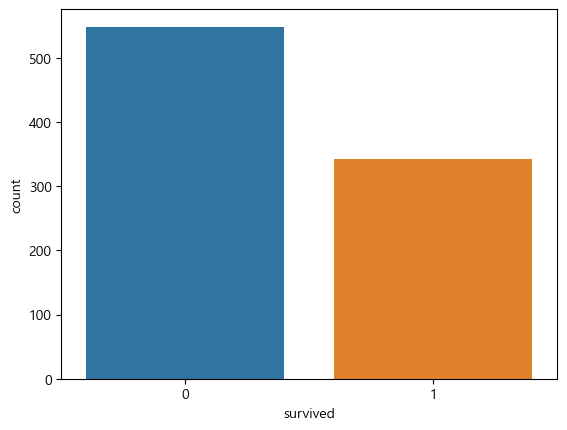

In [10]:
sns.countplot(x = "survived", data = df)

## `pclass`분포 확인

In [12]:
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='pclass'>

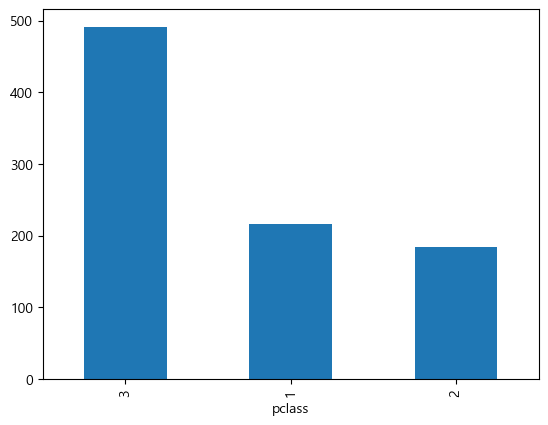

In [14]:
df.pclass.value_counts().plot(kind = "bar")

## `sex` 값 분포 확인

<Axes: xlabel='sex'>

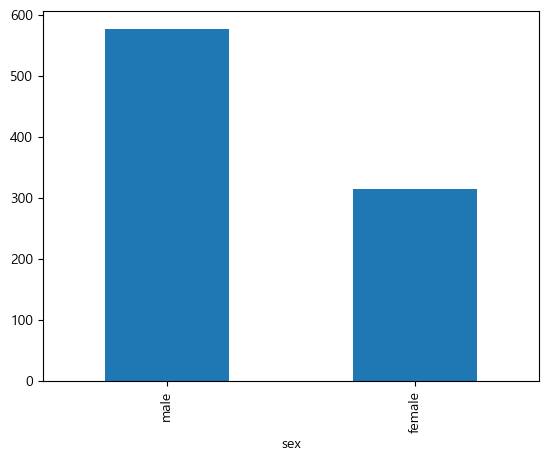

In [15]:
df.sex.value_counts().plot(kind = "bar")

## `age` boxplot

<Axes: >

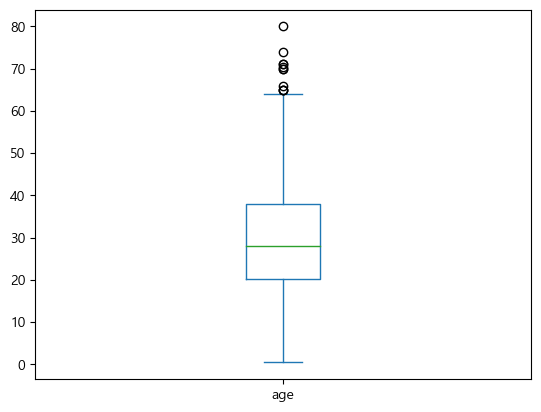

In [16]:
df.age.plot(kind = "box")

### `pclass`별 `age` 분포확인

In [24]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

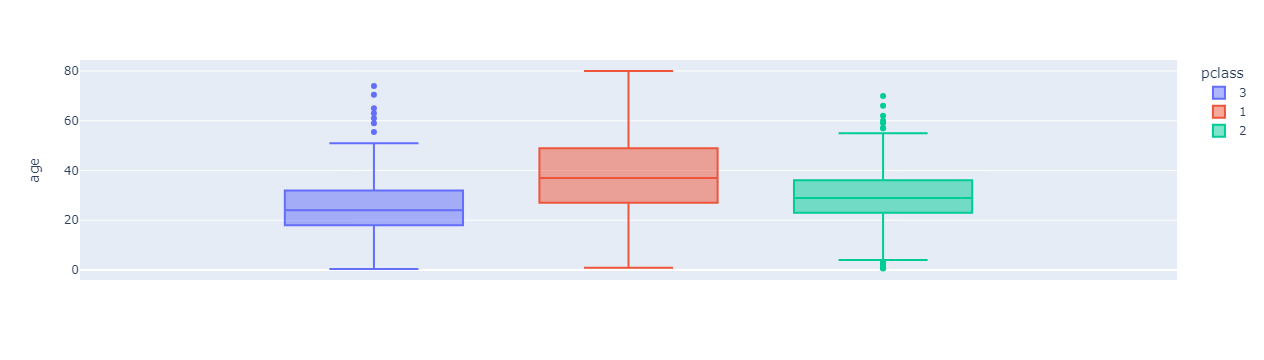

In [25]:
df.plot(y = "age", kind = "box", backend = "plotly",
        color = "pclass")

### `pclass`별 `age` 분포 + `Survived` 추가

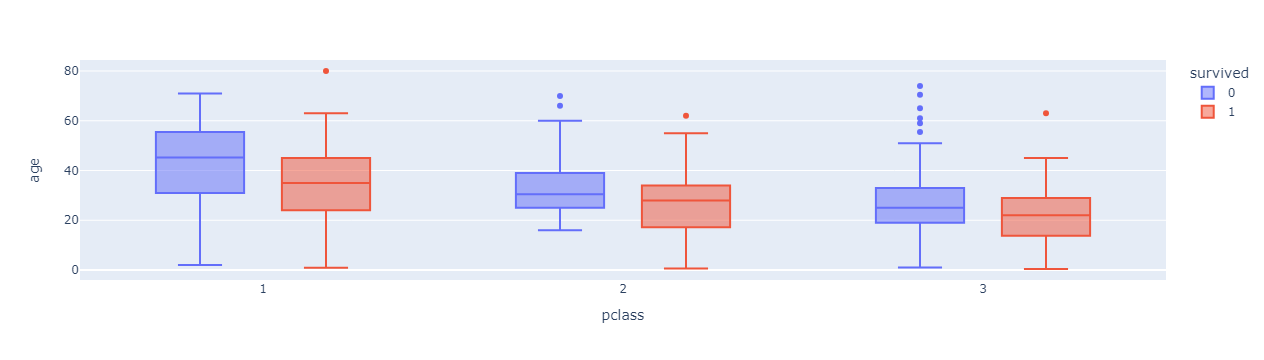

In [32]:
df.plot(x = "pclass", y = "age", kind = "box", backend = "plotly",
        color = "survived")

## pclass별 생존률 평균 구하기 

`-` 결과를 `pclass_grp` 변수에 저장 

In [33]:
target = "survived"

In [40]:
pclass_grp = df.groupby("pclass", as_index = True)[[target]].mean().reset_index()

In [41]:
pclass_grp

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


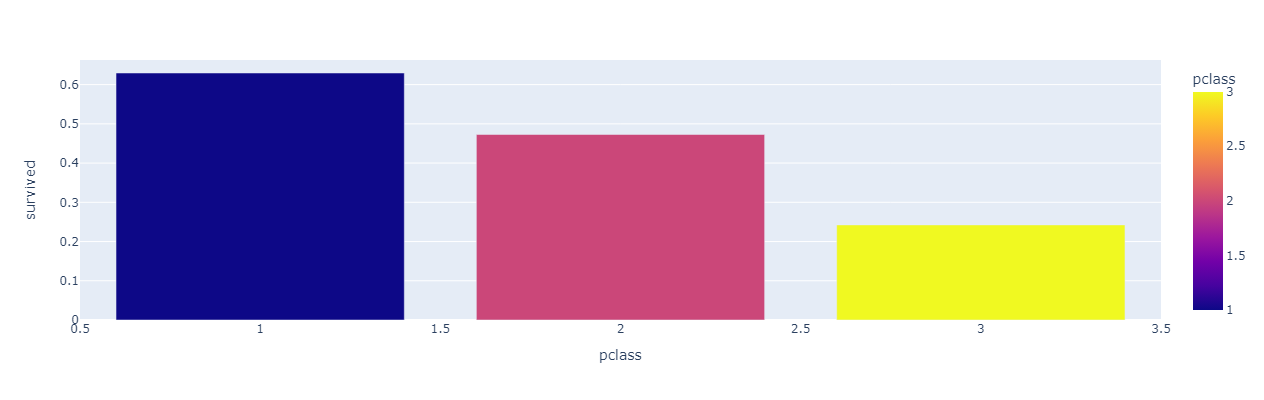

In [44]:
pclass_grp.plot(kind = "bar", backend = "plotly",
                x = "pclass", y = target,color = "pclass", width = 400, height = 400)

# 3. 전처리

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## (1) 중복컬럼삭제

In [46]:
df.drop(["class","alive"], axis = 1, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.7+ KB


## (2) 필요없는 열 삭제

In [48]:
d_col = ['embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alone'] 

df.drop(d_col, axis = 1, inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## (3) 성별 컬럼 정수 인코딩

In [51]:
df["sex"].replace(["male","female"], [0, 1], inplace = True)

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## (4) 결측치 확인

In [53]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

## (5) 결측치 평균값으로 대체

In [55]:
m = df.age.mean()

df.age.fillna(m, inplace = True)

In [56]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# 4. X, y 나누기

In [57]:
X = df.drop(target, axis = 1)
y = df[target]

In [58]:
X.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [59]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [60]:
X = X.values
y = y.values

# 5. 훈련용, 학습용 데이터 셋 나누기

In [61]:
# train_test_split 함수 활용
# 입력 : X, y 
# Train : Test => 8 : 2  비율로 나누기 : test_size=0.2
# 매번 같은 결과 나오도록 값 고정 : random_state=42
# 결과 저장 : X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

`-` 사이즈 확인

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

# 6. 머신러닝 모델링

## (1) tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)

tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

from sklearn.metrics import *

accuracy_score(y_test, tree_pred)

0.8044692737430168

## (2) RF

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators = 10)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

accuracy_score(y_test, rf_pred)

0.7932960893854749

***

# 7. 딥러닝 모델링

In [76]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (6, )
# hidden layer : 10 unit , activation='relu'
# output layer : 2 unit , activation='softmax'

from keras.models import Sequential
from keras.layers import Dense
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.backend import clear_session

model = Sequential()

model.add(Dense(6, input_shape = (X_train.shape[1],), activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(2, activation = "softmax"))
          
model.compile(loss = sparse_categorical_crossentropy, 
               optimizer = Adam(0.001), metrics = ["accuracy"])

In [80]:
history = model.fit(X,y, validation_data = (X_test, y_test),
                    verbose = 0, epochs = 10, batch_size = 8).history

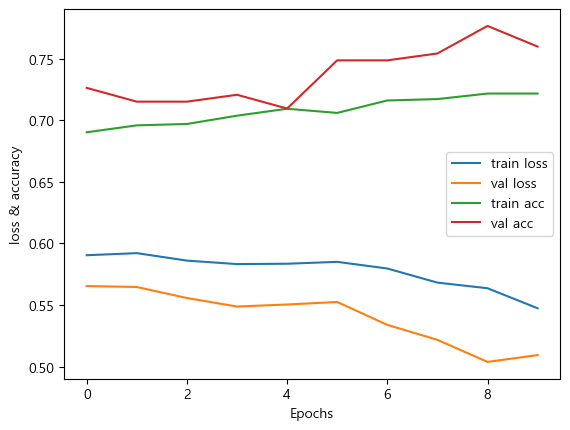

In [81]:
plt.plot(history["loss"], label = "train loss")
plt.plot(history["val_loss"], label = "val loss")
plt.plot(history["accuracy"], label = "train acc")
plt.plot(history["val_accuracy"], label = "val acc")
plt.xlabel("Epochs")
plt.ylabel("loss & accuracy")
plt.legend()
plt.show()

In [84]:
y_pred = model.predict(X_test).argmax(axis = 1)

print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 900us/step
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       105
           1       0.78      0.58      0.67        74

    accuracy                           0.76       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179

